In [1]:
import sys
# Insert base project path here, like:
# sys.path.append("/home/federico/programming/CM/")
sys.path.append("/home/federico/Desktop/University/CM/")

In [2]:
import time
import random
from datetime import datetime as dt

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
plt.rcParams.update({'figure.figsize': (8, 6)})

from src.utils import *
from src.NN.metrics import mean_squared_error
from src.LS.LS import LS
from src.LS.testLS import scaling, generic_test, generate

In [3]:
random.seed(42) # Needed for reproducibility

In [4]:
def plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, mrange, n, save=False):
    
    m = mrange.stop
    
    # --- Plotting QR stats ---
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_qr_a3, "o-", label="mio")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    
    # --- Plotting LS stats ---
    plt.plot(mrange, time_ls_np, "^-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_ls_a3, "o-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

# Scaling test

In [5]:
starting_m = 1000
last_m = 11000
n = 100
step = 1000
repeat = 20
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=11000, t=20
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
1000   || 216.6081 | 216.6081 |   5.6089 |   5.6089 |  42.1442 |  42.1442 |   6.4696 |   6.4696
2000   || 251.3111 |  34.7030 |   6.5138 |   0.9049 |  62.9020 |  20.7578 |   7.6271 |   1.1574
3000   || 312.1835 |  60.8724 |   9.1688 |   2.6550 |  92.6328 |  29.7308 |   9.7660 |   2.1389
4000   || 381.0633 |  68.8797 |  12.9574 |   3.7887 | 129.0201 |  36.3873 |  11.7795 |   2.0134
5000   || 445.4198 |  64.3565 |  16.5068 |   3.5494 | 165.7782 |  36.7581 |  13.9365 |   2.1570
6000   || 511.5416 |  66.1219 |  18.5845 |   2.0777 | 204.7466 |  38.9683 |  17.6978 |   3.7614
7000   || 568.6350 |  57.0934 |  20.6799 |   2.0955 | 239.1080 |  34.3615 |  18.6982 |   1.0004
8000   || 636.6330 |  67.9980 |  24.1866 |   3.5066 | 267.9006 |  28.7926 |  21.2800 |   2.5818
9000   || 692

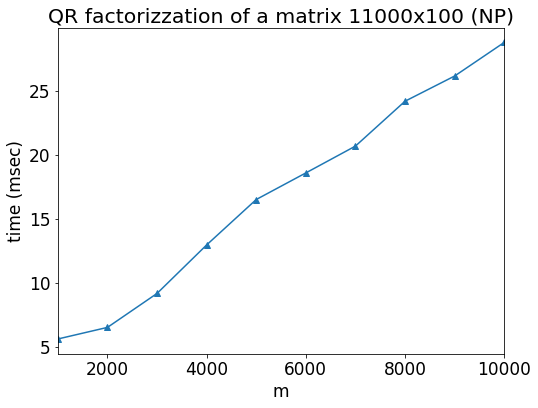

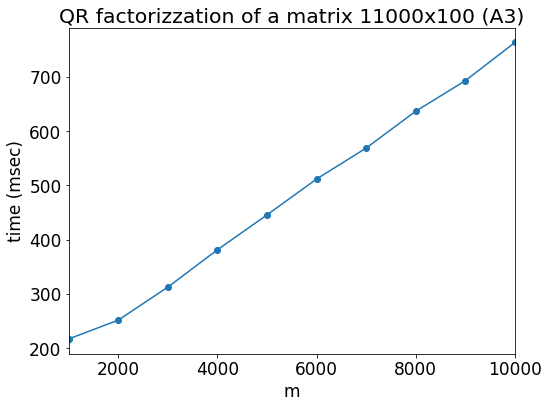

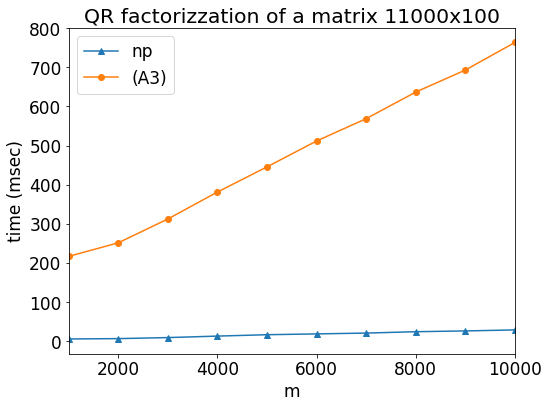

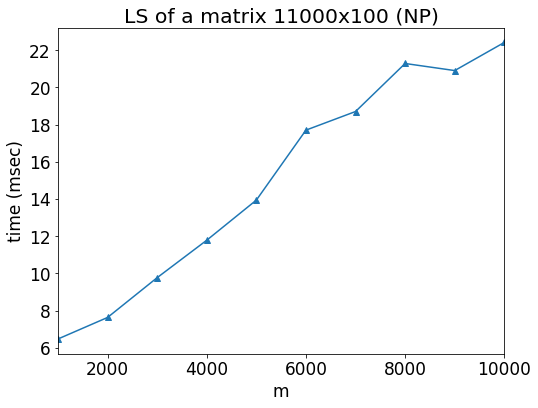

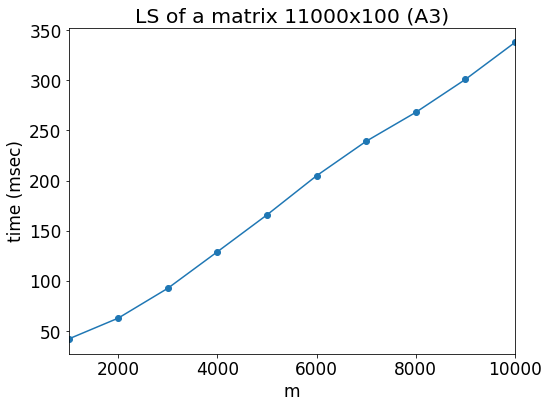

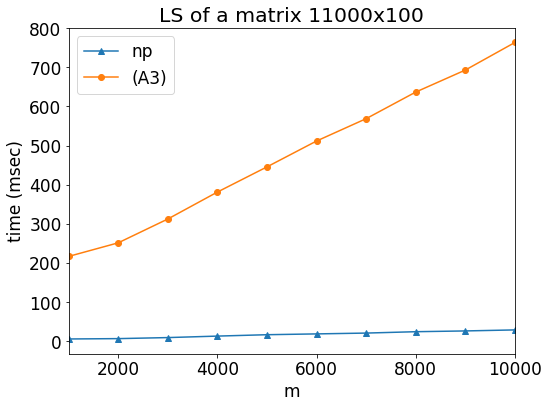

<Figure size 576x432 with 0 Axes>

In [6]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

In [7]:
starting_m = 10000
last_m = 60000
n = 100
step = 10000
repeat = 5
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=60000, t=5
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
10000  || 772.3616 | 772.3616 |  31.8158 |  31.8158 | 360.1254 | 360.1254 |  25.3268 |  25.3268
20000  || 2533.0940 | 1760.7324 | 161.9840 | 130.1682 | 680.4334 | 320.3080 |  85.4162 |  60.0894
30000  || 3888.6302 | 1355.5362 | 342.3980 | 180.4140 | 1125.5996 | 445.1662 | 183.8882 |  98.4720
40000  || 4790.0988 | 901.4686 | 537.4422 | 195.0442 | 1323.2506 | 197.6510 | 276.5012 |  92.6130
50000  || 5959.3608 | 1169.2620 | 753.5452 | 216.1030 | 1797.6472 | 474.3966 | 376.0468 |  99.5456

m        residual A3              residual np              reconstruct a3           reconstruct np          
----------------------------------------------------------------------------------------------------
10000  ||     1.0038364913226332 |     0.9946929947309094 | 1.1564180197968884e-1

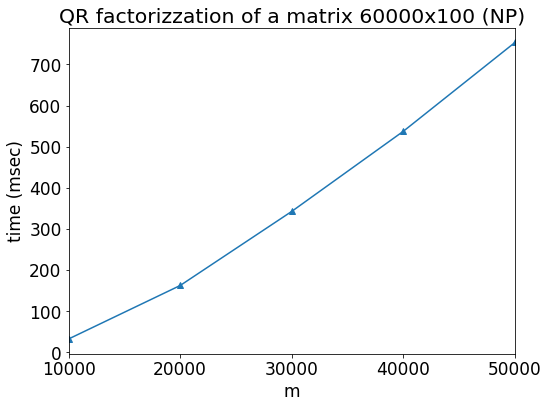

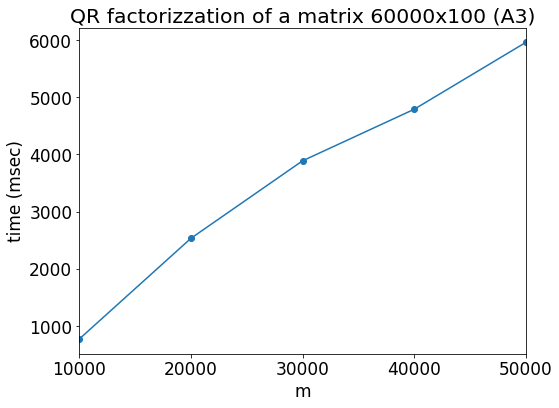

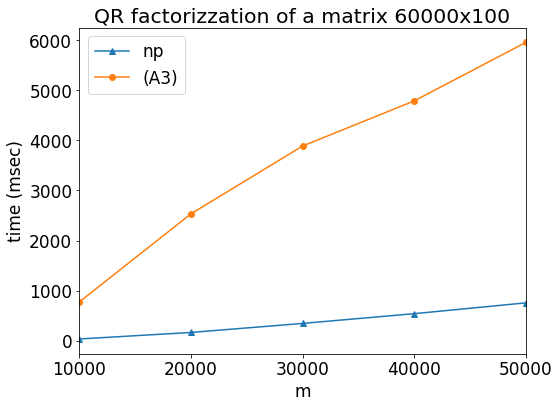

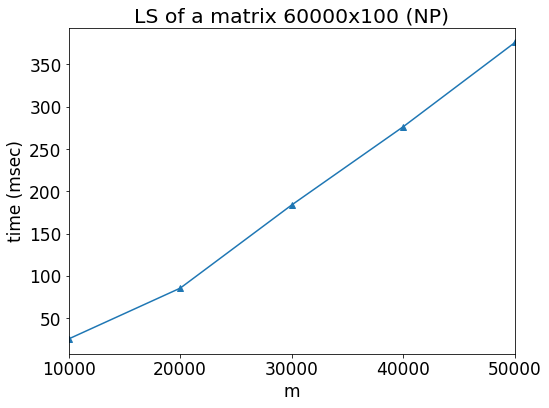

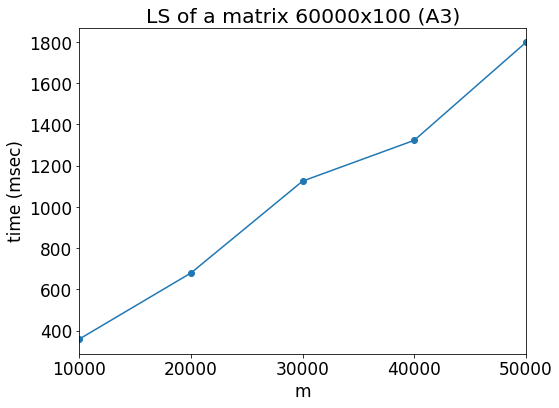

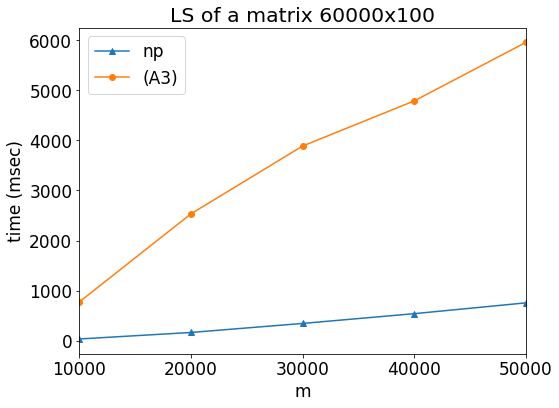

<Figure size 576x432 with 0 Axes>

In [8]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

# CUP test

In [9]:
cup = '../../data/ML-CUP20-TR.csv'

In [10]:
M, M_test, b, b_test = load_CUP(cup, split=0)
res, resnp = generic_test(M, b, 'CUP')
print(f"MSE A3: {mean_squared_error(np.matmul(M, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(M, resnp),b)}\n\n")


A,b = generate(5000,50)
res, resnp = generic_test(A, b, 'RANDOM')
print(f"MSE A3: {mean_squared_error(np.matmul(A, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(A, resnp),b)}")

---------- CUP DATASET ----------
Solved (m x n): (1524,10) in 3.533 msec, w/ np in 0.329 msec - Reverting and reconstruction: 3.118 msec, w/ np took: 0.417 msec
res error: 1.0537730959643323 - np_res error: 0.9962999753126452
QR error: 4.985905640396062e-16 - QR error w/ np: 3.2893174070752376e-16

MSE A3: 972.4632084924591
MSE np: 869.279035729481


---------- RANDOM DATASET ----------
Solved (m x n): (5000,50) in 52.183 msec, w/ np in 5.508 msec - Reverting and reconstruction: 131.642 msec, w/ np took: 5.169 msec
res error: 1.0051257949606285 - np_res error: 0.994796664107203
QR error: 7.736187730576775e-16 - QR error w/ np: 3.8651536202539743e-16

MSE A3: 0.4920606913668189
MSE np: 0.4819993757656366
